# Chapter 3: An example of the power of series: a bouncy ball
Chapter 3 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#W7jZxE54KWWuUWEC.97) shows how to represent an analytic function with a(n infinite) power series, and how to approximate such a function with a special power series called the "Taylor series." Power series help explain, for example, how butterfy wings have such beautiful colors, but also how long or how far a ball can bounce. No thrown ball can bounce indefinitely, because it loses energy upon contact with the ground (and even while traveling in the air) due to friction:

![fig3_3.png](https://ndownloader.figshare.com/files/9874762)
While the first bounce reaches a height $H$, the second bounce is lower. We bundle this energy loss to friction in the term $\gamma$, the ratio between the energy in the current and previous bounce:
$$ E_{n} = \gamma E_{n-1}.$$

The energy in the bouncing ball with mass $m$ is stored in potential ($mgh$, where $g$ is the gravitational acceleration and $h$ the height of the ball) and kinetic energy ($mv^2/2$, where $v$ is the speed of the ball).
As a result, we can express the travel time and the vertical distance of the n-th bounce in terms of the loss parameter $\gamma$. 

## Bouncing distance
The path length $s$ of the $n$-th bounce is
$$s_n = s_{n-1}(1-\gamma).$$

In [1]:
import matplotlib.pyplot as plt
H=1 # m
gamma= 0.2 # a 20 percent loss of bounce energy, per bounce
s = [2*H, 2*H*(1-gamma)]
plt.plot(s,'d',clip_on=False)
plt.xlabel('Bounce')
plt.ylabel('Bounce path length $s$ (m)')
plt.xticks([0,1])
plt.show()

If we assume the first bounce was at $z= H$, we derived that the total vertical path traveled by the bouncing ball is then:
$$S_n = \sum_{n=0}^\infty s_n = 2H \sum_{n=0}^\infty (1-\gamma)^n$$

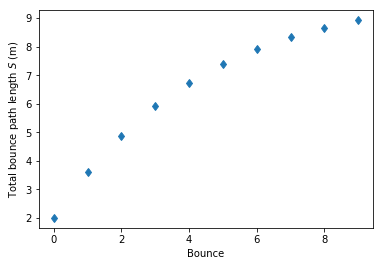

In [2]:
import numpy as np

bounces = np.arange(10)
s=[]
for bounce in bounces:
    s.append(2*H*(1-gamma)**bounce)                        
S = np.cumsum(s)
plt.plot(S,'d',clip_on=False)
plt.xlabel('Bounce')
plt.ylabel('Total bounce path length $S$ (m)')
plt.show()

### In the case of small or large values of $\gamma$
For small losses, it is easy to see from the summation expression that the path length for $n$ bounces approximates 
$$ S_n \approx 2nH.$$
A 1 percent loss of bounce energy, per bounce gives us:

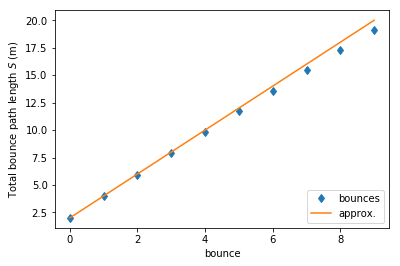

In [3]:
gamma= 0.01 
bounces = np.arange(10)
s=[] # s is the path length of a single bounce
for bounce in bounces:
    s.append(2*H*(1-gamma)**bounce)                        
S = np.cumsum(s) # the cumulative sum of the path lengths
plt.plot(S,'d',clip_on=False,label='bounces')
plt.plot(2*(bounces+1)*H,label='approx.')
plt.xlabel('bounce')
plt.ylabel('Total bounce path length $S$ (m)')
plt.legend(loc=4)
plt.show()

For the first bounces, the cumulative bounce path length increases linearly (2 m, 4 m, 6 m, ....), but after 5 or 6 bounces the loss per bounce -- however small -- results in less-than-linear increases in cumulative path length.

But for large values of $\gamma$, we derive in the book a Taylor series approximation results in $$ S_n \approx 2H /\gamma.$$ 

A 50 percent loss of bounce energy, per bounce results in:

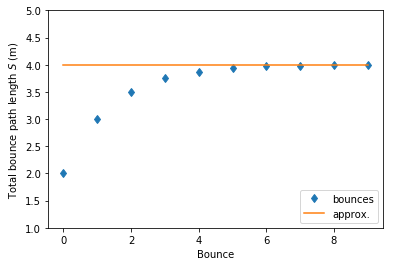

In [4]:
gamma= 0.5
bounces = np.arange(10)
s=[] # s is the path length of a single bounce
for bounce in bounces:
    s.append(2*H*(1-gamma)**bounce)                        
S = np.cumsum(s) # the cumulative sum of the path lengths
plt.plot(S,'d',clip_on=False,label='bounces')
plt.plot(np.ones(len(bounces))*2*H/gamma, label='approx.')
plt.ylim([1,5])
plt.xlabel('Bounce')
plt.ylabel('Total bounce path length $S$ (m)')
plt.legend(loc=4)
plt.show()

With an initial bounce height of $H=1$ m, the ball stopped somewhere after 5 or 6 bounces. the total cumulative path length is 4 m. The most extreme case is that of a ball that does not bounce at all: It will go up once, and come to rest on impact! Then, $\gamma=1$, and the path length is $2H$ precisely.

## Bouncing time
Similarly, from our book you can learn the $n$-th bounce takes $t_n = t_{n-1}\sqrt{1-\gamma}$ seconds. 
We derive there how the first bounce takes $t_0 = \sqrt{\frac{8H}{g}}$ seconds, so that the cumulative travel time for $N$ bounces is
$$T_n = \sum_{n=0}^{N} t_n =\sqrt{\frac{8H}{g}}\sum_{n=0}^{N} \left(\sqrt{1-\gamma}\right)^n.$$
Here is the result for $N=10$, and $\gamma =0.3$: 

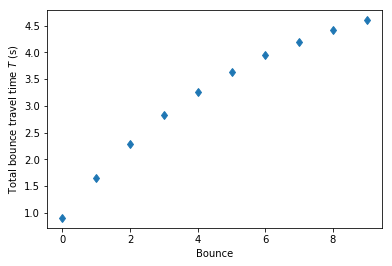

In [5]:
gamma= 0.3
N=10
g = 9.8 #m/s^2
H=1
bounces = np.arange(N)
t=[] # t is the travel time of a single bounce
for bounce in bounces:
    t.append(np.sqrt(8*H/g)*np.sqrt(1-gamma)**bounce)                        
T = np.cumsum(t) # the cumulative sum of the path lengths
plt.plot(T,'d',clip_on=False,label='bounces')
plt.xlabel('Bounce')
plt.ylabel('Total bounce travel time $T$ (s)')
plt.show()

In the limit of $N \to \infty$, the book shows you that 
$$ T_n = \sum_{n=0}^{\infty} t_n =\sqrt{\frac{8H}{g}}\sum_{n=0}^{\infty} \left(\sqrt{1-\gamma}\right)^n = \sqrt{\frac{8H}{g}} \frac{1}{1 - \sqrt{1-\gamma}}.$$
Let's compare the series and the analytic solution for $N=30$:

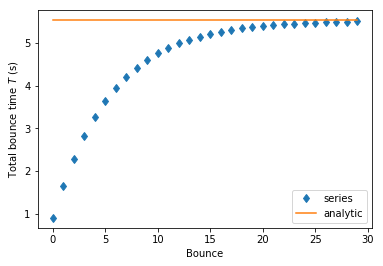

In [6]:
gamma= 0.3
N=30
g = 9.8 #m/s^2
H=1
bounces = np.arange(N)
t=[] # t is the time for a single bounce
for bounce in bounces:
    t.append(np.sqrt(8*H/g)*np.sqrt(1-gamma)**bounce)                        
T = np.cumsum(t) # the cumulative sum of the bounce times
plt.plot(T,'d',clip_on=False,label='series')
plt.plot(np.ones(len(bounces))*np.sqrt(8*H/g)/(1-np.sqrt(1-gamma)),label='analytic')
plt.xlabel('Bounce')
plt.ylabel('Total bounce time $T$ (s)')
plt.legend(loc=4)
plt.show()

### An approximation for small values of $\gamma$

Again, we can obtain a Taylor approximation for small values of $\gamma$:
$$ T_n \approx \sqrt{\frac{8H}{g}} \frac{2}{\gamma}.$$

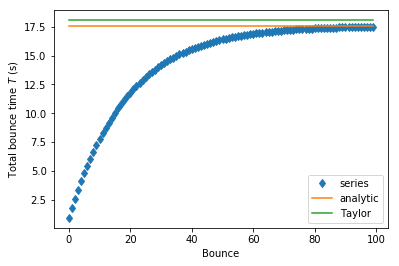

In [7]:
gamma= 0.1
N=100
g = 9.8 #m/s^2
H=1
bounces = np.arange(N)
t=[] # t is the time for a single bounce
for bounce in bounces:
    t.append(np.sqrt(8*H/g)*np.sqrt(1-gamma)**bounce)                        
T = np.cumsum(t) # the cumulative sum of the bounce times
plt.plot(T,'d',clip_on=False,label='series')
plt.plot(np.ones(len(bounces))*np.sqrt(8*H/g)/(1-np.sqrt(1-gamma)),label='analytic')
plt.plot(np.ones(len(bounces))*np.sqrt(8*H/g)*2/gamma,label='Taylor')
plt.xlabel('Bounce')
plt.ylabel('Total bounce time $T$ (s)')

plt.legend(loc=4)
plt.show()

The Taylor approximation only holds for small values of $\gamma$. In fact, in the example above there is certainly "daylight" between the exact solution and our Taylor approximation. For larger values of $\gamma$ this gap would grow. For $\gamma \to 1$, it is clear from the series representation and the analytic solution that $T_n \to t_0$, but if we were to use the Taylor approximation for large values of $\gamma$, one might be fooled that $T_n = 2t_0$! Therefore, one has to take care into developing the Taylor series around the values of the argument of interest.

If you want to play with the parameters and approximations yourself, [download this blog as a jupyter notebook](https://figshare.com/articles/bouncyball_ipynb/5660668).

## Other applications of power series and Taylor series approximations
The tools you saw in action to explain the path and time of a bouncing ball apply to as many problems in Engineering and Physics as the Taylor series is long. In our book, for example, we look at the reflection and transmission of light through thin layers. These explain the beautiful colors of butterflies, birds, and soapy bubbles, to name a few.



## Assignment
Record on your phone or other device the drop and bounces of two types of balls (tennis ball and football, for example). Write a code to track the location of the ball in each frame, fit the data to find the loss parameter $\gamma$ for both balls.